In [20]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats as stats
import statsmodels.stats.multicomp as mc

In [22]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [23]:
df=boston_df

In [24]:
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


Get some exploratory data:

In [25]:
df.info()

df.describe()

df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

Descriptive Statistics: For the "Median value of owner-occupied homes" provide a boxplot

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>],
       [<Axes: title={'center': 'CHAS'}>,
        <Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'DIS'}>, <Axes: title={'center': 'RAD'}>,
        <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

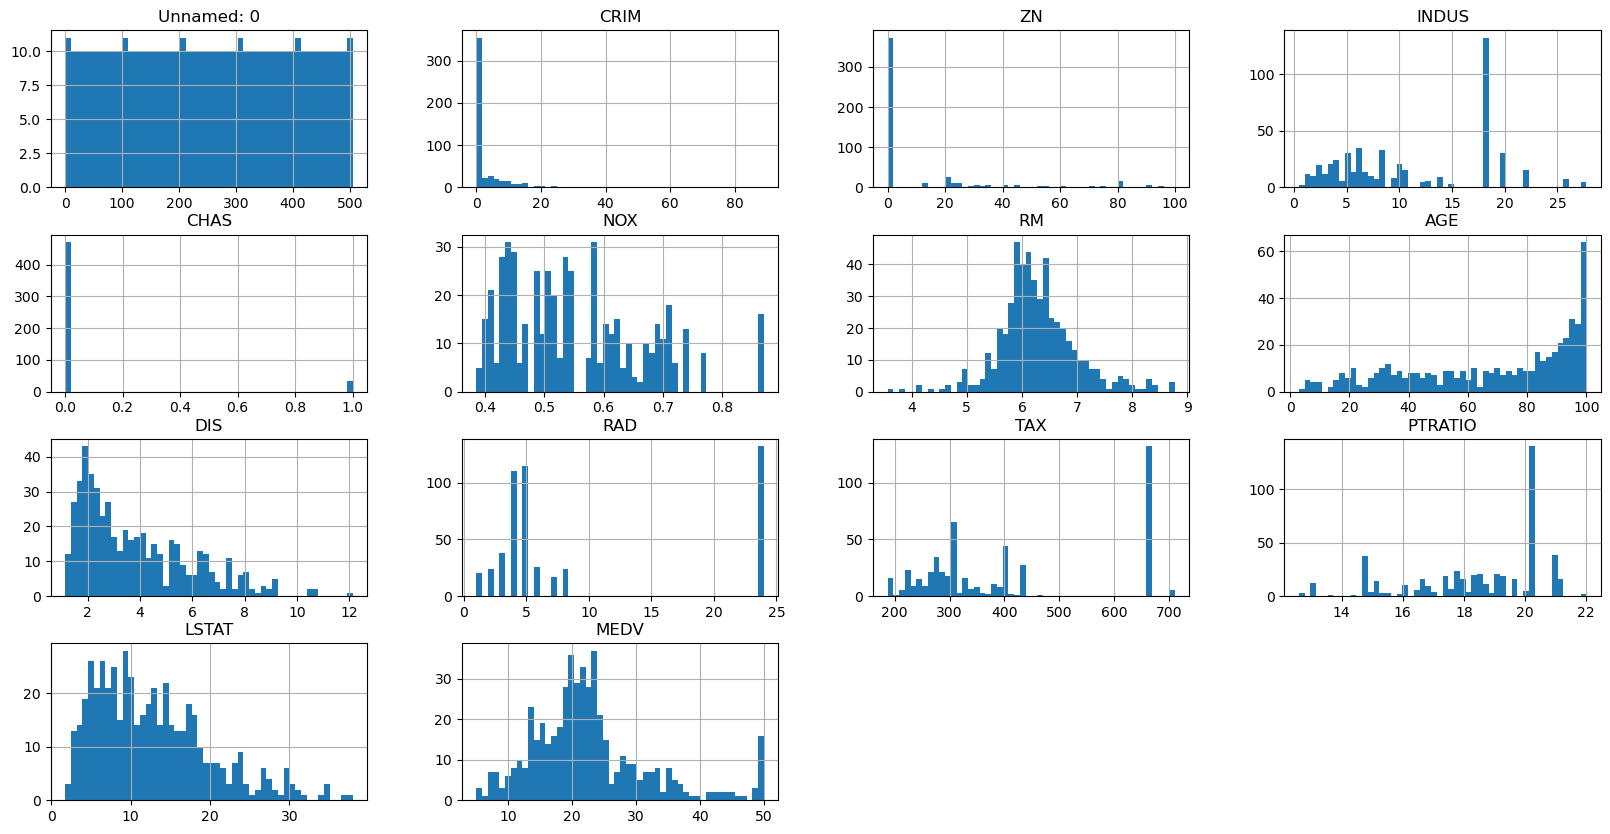

In [19]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

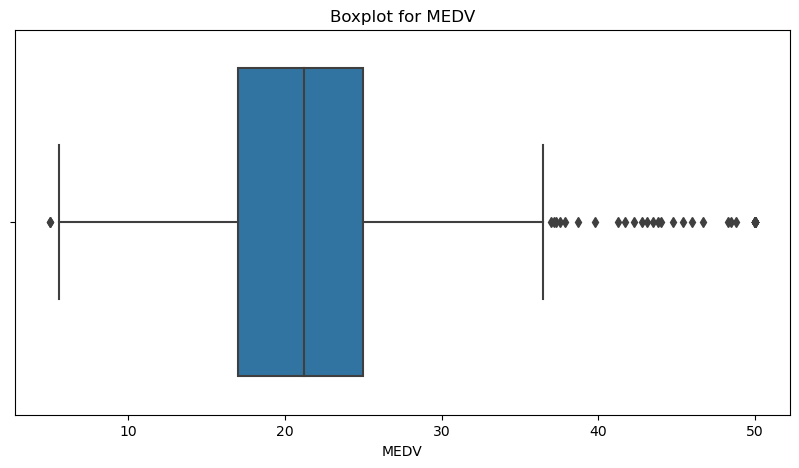

In [26]:
#create Boxplot for median value of owner-occupied homes
plt.figure(figsize=(10,5))
sns.boxplot(x=df.MEDV)
plt.title("Boxplot for MEDV")
plt.show()

#create Boxplot for median value of owner-occupied homes
plt.figure(figsize=(10,5))
sns.boxplot(x=df.MEDV)
plt.title("Boxplot for MEDV")
plt.show()

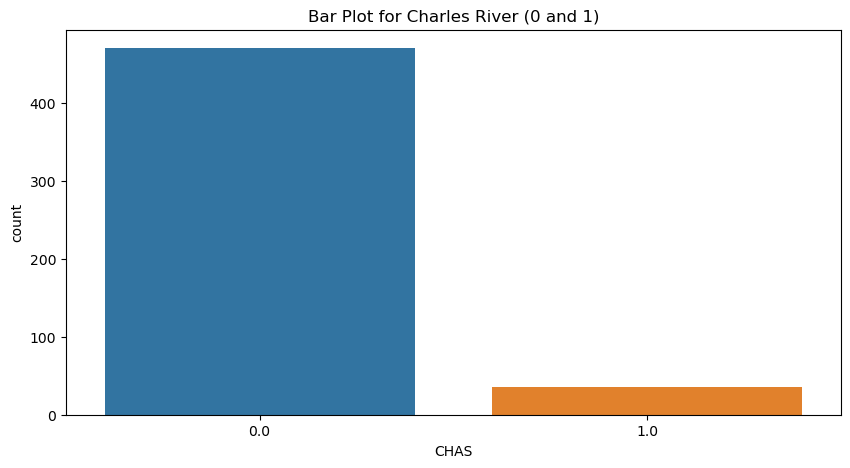

In [29]:
#Create barplot for Charles River (1 if tract bounds river 0 otherwise)
plt.figure(figsize=(10, 5))
sns.countplot(x='CHAS', data=df)
plt.title("Bar Plot for Charles River (0 or 1)")
plt.show()

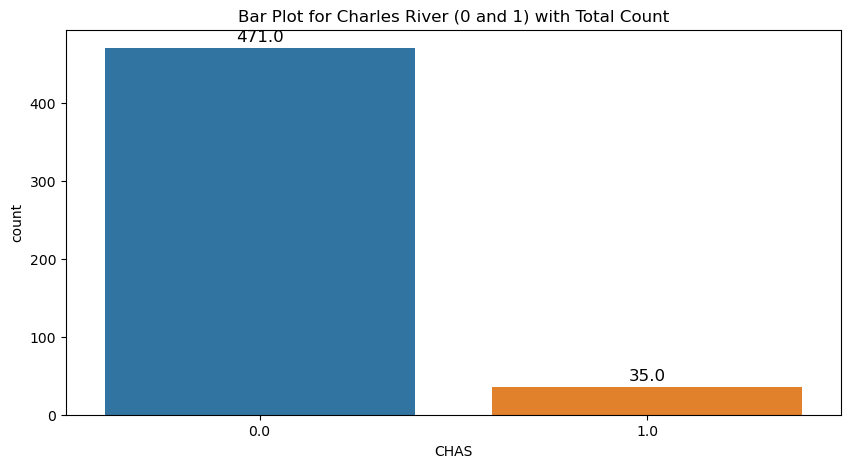

In [30]:
#create barplot with total count
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='CHAS', data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Bar Plot for Charles River (0 or 1) with Total Count")
plt.show()

Descriptive Statistics: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

In [31]:
#create age_group
df.loc[(df["AGE"] <= 35),'age_group'] = '35 years and younger'
df.loc[(df["AGE"] > 35) & (df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
df.loc[(df["AGE"] >= 70),'age_group'] = '70 years and older'

In [32]:
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


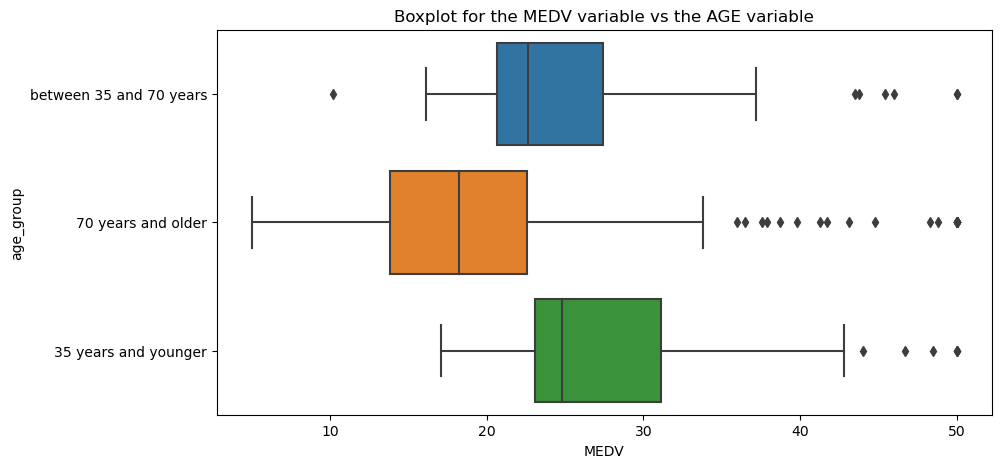

In [33]:
#Create boxplot for MEDV vs AGE
plt.figure(figsize=(10,5))
sns.boxplot(x=df.MEDV, y=df.age_group, data=df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

Descriptive Statistics: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

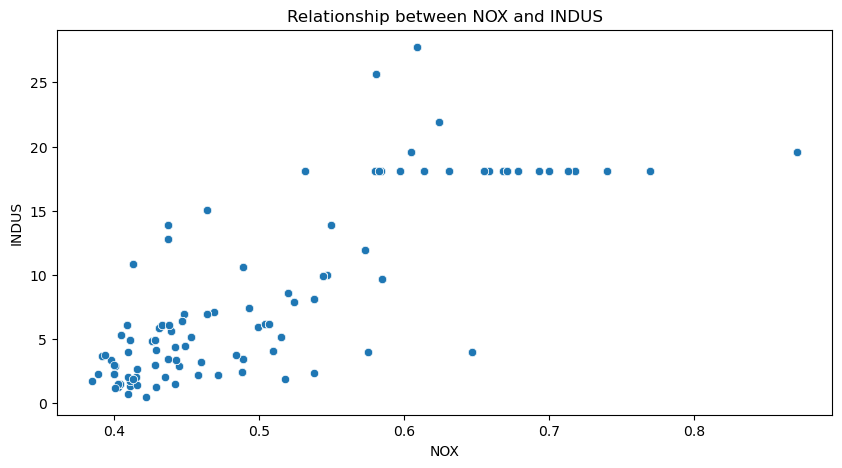

In [34]:
#Create Scatterplot Nitric oxide vs INDUS
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.NOX, y=df.INDUS, data=df)
plt.title("Relationship between NOX and INDUS")
plt.show()

What can you say about the relationship? It seems there might be a relationsship (r-square 0.58) . However, this suggests it is moderate degree of correlation. 

Descriptive Statistics: Create a histogram for the pupil to teacher ratio variable

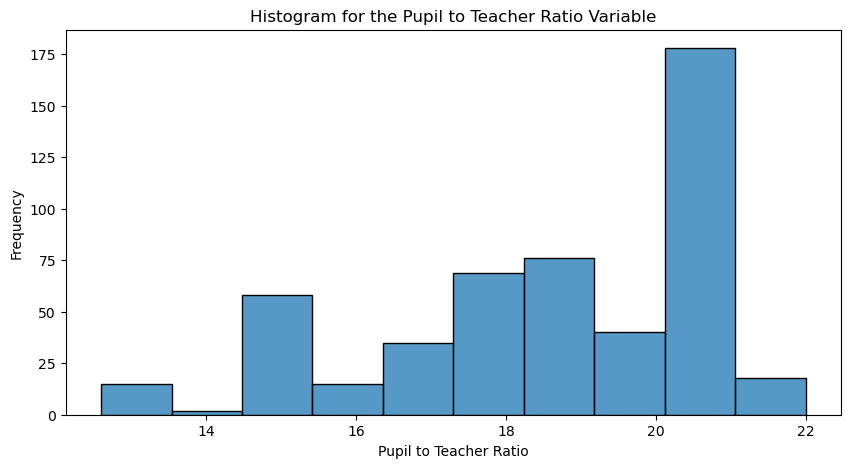

In [42]:
#create histogram for pupilto  teacher ration by town
plt.figure(figsize=(10, 5))
sns.histplot(x=df['PTRATIO'], bins=10, kde=False)
plt.title("Histogram for the Pupil to Teacher Ratio by Town Variable")
plt.xlabel("Pupil to Teacher Ratio")
plt.ylabel("Frequency")
plt.show()


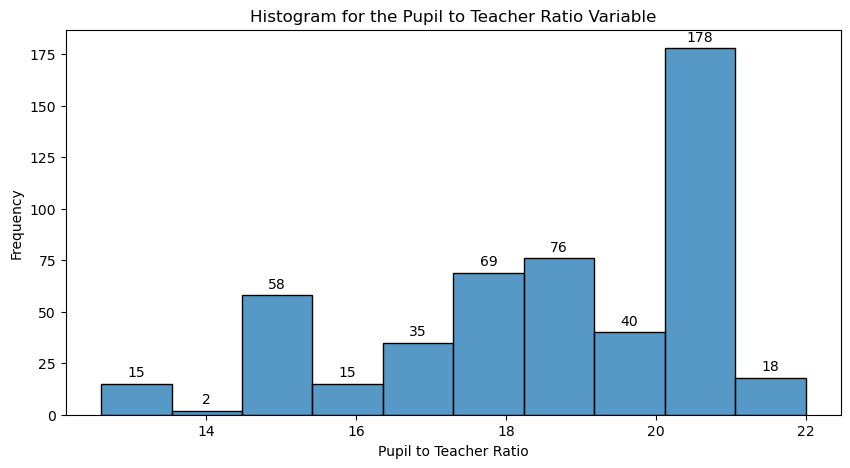

In [43]:
#With extra bin count

plt.figure(figsize=(10, 5))
ax = sns.histplot(x=df['PTRATIO'], bins=10, kde=False)

# Annotate each bin with its count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Histogram for the Pupil to Teacher Ratio by Town Variable")
plt.xlabel("Pupil to Teacher Ratio")
plt.ylabel("Frequency")
plt.show()


Stastical Analysis

Stastical Analysis: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
null hypothesis: there is a significant differnce between the groups

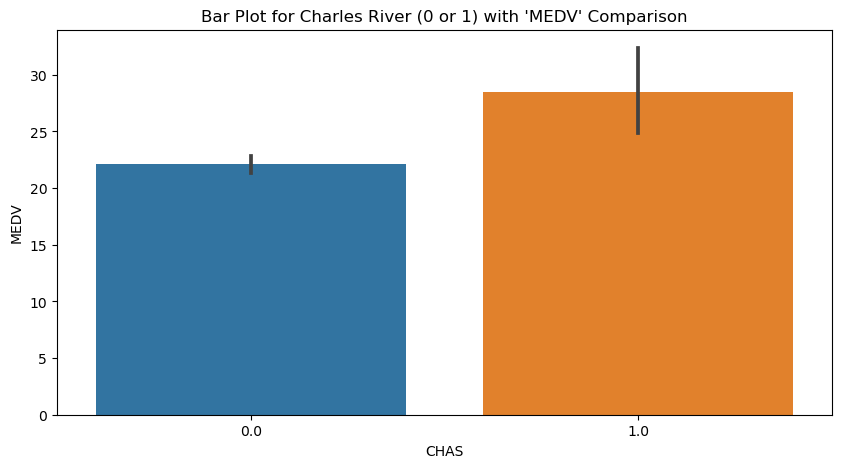

T-statistic: -3.9964
P-value: 0.0001
Reject the null hypothesis. There is a significant difference between the groups.


In [45]:
# is there a significant difference between MEDV and CHAS?
plt.figure(figsize=(10, 5))
sns.barplot(x='CHAS', y='MEDV', data=df)
plt.title("Bar Plot for Charles River (0 or 1) with 'MEDV' Comparison")
plt.show()

# Perform independent samples t-test
group_0 = df[df['CHAS'] == 0]['MEDV']
group_1 = df[df['CHAS'] == 1]['MEDV']

t_stat, p_value = stats.ttest_ind(group_0, group_1)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Conclusion:  P value is smaller then 0.05, the null hypothesis cannot be rejected. So this means there is a significant difference between the two groups. 

Stastical Analysis:Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
Null hypothesis: There is a significant difference in median values compared to the different age groups.

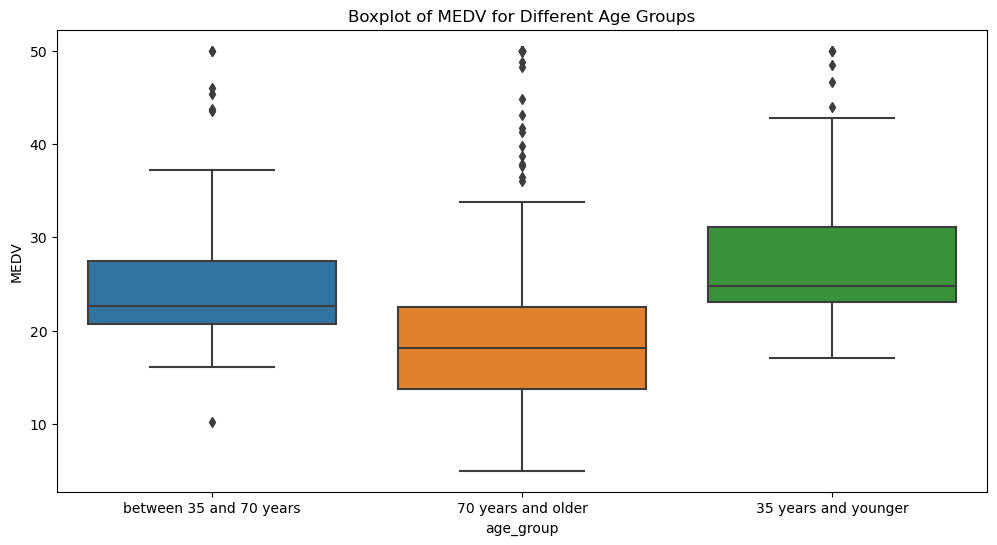

F-statistic: 36.4076
P-value: 0.0000
Reject the null hypothesis. There is a significant difference in median values.


In [47]:
# plot medv and age groups
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='MEDV', data=df)
plt.title("Boxplot of MEDV for Different Age Groups")
plt.show()

# Perform ANOVA with age groups
f_stat, p_value = stats.f_oneway(
    df[df['age_group'] == '35 years and younger']['MEDV'],
    df[df['age_group'] == 'between 35 and 70 years']['MEDV'],
    df[df['age_group'] == '70 years and older']['MEDV']
)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")


Conclusion for the one way ANOVA: the P value is smaller then 0.05 so the null hypothesis can not be rejected.  This means there is a significant difference in MEDV values and the age groups. 

Stastical Analysis:Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State hypothesis:
NOX is not Correlated with INDUS
NOX is correlated with INDUS

In [51]:
# Calculate Pearson correlation
correlation = df['NOX'].corr(df['INDUS'])

print(f"Pearson Correlation Coefficient: {correlation:.4f}")


Pearson Correlation Coefficient: 0.7637
There is a significant correlation between NOX and INDUS.
The correlation is positive.


Conclusion: the correlation coofficient is close to 1 which means There is a significant correlation between NOX and INDUS. This is a positive correlation. 


Stastical Analysis:What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
Null hypothesis: There is no statistically significant linear relationship between the weighted distance to the five Boston employment centers (DIS) and the median value of owner-occupied homes (MEDV).

In [53]:
import statsmodels.api as sm

# Add a constant term for the intercept
df['intercept'] = 1

# Define independent variable (X) and dependent variable (y)
X = df[['intercept', 'DIS']]
y = df['MEDV']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        16:21:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     18.3901      0.817     22.499      0.0

Conclusion. the Pvalue is smaller then 0.05 so the null hypothesis needs to be rejected. This means there is a statistical significant relationsship. between the weighted distance to the five Boston employment centers (DIS) and the median value of owner-occupied homes (MEDV).